In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio




import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
!apt-get update
!apt-get install -y libsndfile1

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,596 kB]
Get:14 http://archive.ubuntu.com/ubunt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:

from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your .zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/dataset2.zip'

# Extract the zip file to a specified directory in Colab
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

# Assuming the main folder is extracted into /content/extracted_folder
# Get the name of the main folder
main_folder_name = os.listdir('/content/extracted_folder')[0]

# Path to the main folder
main_folder_path = os.path.join('/content/extracted_folder', main_folder_name)

# List all folder names inside the main folder
ravdess_directory_list = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

# Print the list of folder names
print(ravdess_directory_list)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Actor_10', 'Actor_12', 'Actor_09', 'Actor_17', 'Actor_18', 'Actor_01', 'Actor_11', 'Actor_04', 'Actor_20', 'Actor_07', 'Actor_14', 'Actor_06', 'Actor_22', 'Actor_15', 'Actor_24', 'Actor_13', 'Actor_19', 'Actor_03', 'Actor_21', 'Actor_02', 'Actor_16', 'Actor_08', 'Actor_23', 'Actor_05']


In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file_path = '/content/drive/MyDrive/dataset2.zip'

# Extract the zip file to a specified directory in Colab
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

In [ ]:
# Assuming the main folder is extracted into /content/extracted_folder
# Get the name of the main folder
main_folder_name = os.listdir('/content/extracted_folder')[0]

# Path to the main folder
main_folder_path = os.path.join('/content/extracted_folder', main_folder_name)

# List all folder names inside the main folder
ravdess_directory_list = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

# Print the list of folder names
print(ravdess_directory_list)

['Actor_10', 'Actor_12', 'Actor_09', 'Actor_17', 'Actor_18', 'Actor_01', 'Actor_11', 'Actor_04', 'Actor_20', 'Actor_07', 'Actor_14', 'Actor_06', 'Actor_22', 'Actor_15', 'Actor_24', 'Actor_13', 'Actor_19', 'Actor_03', 'Actor_21', 'Actor_02', 'Actor_16', 'Actor_08', 'Actor_23', 'Actor_05']


In [ ]:
ravdess = os.path.join('/content/extracted_folder', main_folder_name)

# List all folder names inside the main folder
ravdess_directory_list = [f for f in os.listdir(ravdess) if os.path.isdir(os.path.join(ravdess, f))]

# Print the list of folder names
print(ravdess_directory_list)

['Actor_10', 'Actor_12', 'Actor_09', 'Actor_17', 'Actor_18', 'Actor_01', 'Actor_11', 'Actor_04', 'Actor_20', 'Actor_07', 'Actor_14', 'Actor_06', 'Actor_22', 'Actor_15', 'Actor_24', 'Actor_13', 'Actor_19', 'Actor_03', 'Actor_21', 'Actor_02', 'Actor_16', 'Actor_08', 'Actor_23', 'Actor_05']


In [ ]:
file_emotion = []
file_path = []

# Loop through each actor's directory
for i in ravdess_directory_list:
    actor_dir = os.path.join(ravdess, i)  # Construct full path to actor directory
    actor_files = os.listdir(actor_dir)  # List all files for the actor

    # Print the first actor directory
    print(f"Actor directory: {i}")
    for f in actor_files:
        part = f.split('.')[0].split('-')  # Extract information from the file name

        # Print values as per your request
        print(f"File: {f}")
        print(f"File parts: {part}")
        print(f"Emotion part (part[2]): {int(part[2])}")
        print(f"File path: {os.path.join(actor_dir, f)}")

        # Append values to lists
        file_emotion.append(int(part[2]))  # Third part represents the emotion
        file_path.append(os.path.join(actor_dir, f))  # Full path to the file

# Print first elements for verification
print(f'First actor: {ravdess_directory_list[0]}')
print(f'First file in first actor: {file_path[0]}')
print(f'Emotion for first file: {file_emotion[0]}')

Streaming output truncated to the last 5000 lines.
Emotion part (part[2]): 2
File path: /content/extracted_folder/dataset2/Actor_22/03-01-02-02-02-01-22.wav
File: 03-01-07-01-02-01-22.wav
File parts: ['03', '01', '07', '01', '02', '01', '22']
Emotion part (part[2]): 7
File path: /content/extracted_folder/dataset2/Actor_22/03-01-07-01-02-01-22.wav
File: 03-02-03-01-01-02-22.wav
File parts: ['03', '02', '03', '01', '01', '02', '22']
Emotion part (part[2]): 3
File path: /content/extracted_folder/dataset2/Actor_22/03-02-03-01-01-02-22.wav
File: 03-01-04-02-01-02-22.wav
File parts: ['03', '01', '04', '02', '01', '02', '22']
Emotion part (part[2]): 4
File path: /content/extracted_folder/dataset2/Actor_22/03-01-04-02-01-02-22.wav
File: 03-01-05-01-02-01-22.wav
File parts: ['03', '01', '05', '01', '02', '01', '22']
Emotion part (part[2]): 5
File path: /content/extracted_folder/dataset2/Actor_22/03-01-05-01-02-01-22.wav
File: 03-01-04-01-01-02-22.wav
File parts: ['03', '01', '04', '01', '01', '

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

<ipython-input-10-48e4565091c5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


   Emotions                                               Path
0   neutral  /content/extracted_folder/dataset2/Actor_10/03...
1   disgust  /content/extracted_folder/dataset2/Actor_10/03...
2     happy  /content/extracted_folder/dataset2/Actor_10/03...
3  surprise  /content/extracted_folder/dataset2/Actor_10/03...
4   neutral  /content/extracted_folder/dataset2/Actor_10/03...
______________________________________________
     Emotions                                               Path
2447    happy  /content/extracted_folder/dataset2/Actor_05/03...
2448    angry  /content/extracted_folder/dataset2/Actor_05/03...
2449  neutral  /content/extracted_folder/dataset2/Actor_05/03...
2450     fear  /content/extracted_folder/dataset2/Actor_05/03...
2451  neutral  /content/extracted_folder/dataset2/Actor_05/03...
_______________________________________________
Emotions
neutral     564
happy       376
angry       376
fear        376
sad         376
disgust     192
surprise    192
Name: count, dty

In [ ]:

main_folder_name = os.listdir('/content/extracted_folder')[0]

# Path to the main folder
ravdess = os.path.join('/content/extracted_folder', main_folder_name)

# List all folder names inside the main folder
ravdess_directory_list = [f for f in os.listdir(ravdess) if os.path.isdir(os.path.join(ravdess, f))]

# Print the list of folder names
print(ravdess_directory_list)

['Actor_10', 'Actor_12', 'Actor_09', 'Actor_17', 'Actor_18', 'Actor_01', 'Actor_11', 'Actor_04', 'Actor_20', 'Actor_07', 'Actor_14', 'Actor_06', 'Actor_22', 'Actor_15', 'Actor_24', 'Actor_13', 'Actor_19', 'Actor_03', 'Actor_21', 'Actor_02', 'Actor_16', 'Actor_08', 'Actor_23', 'Actor_05']


In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # As there are 24 different actors in the directory, we need to extract files for each actor.
    actor = os.listdir(os.path.join(ravdess, i))
    for f in actor:
        part = f.split('.')[0].split('-')
        # The third part in each file name represents the emotion associated with that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(ravdess, i, f))

In [ ]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-02-02-02-01-05.wav
03
/content/extracted_folder/dataset2/Actor_10/03-02-02-01-02-02-10.wav
2
03-01-02-01-02-02-05.wav


In [ ]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0   neutral  /content/extracted_folder/dataset2/Actor_10/03...
1   disgust  /content/extracted_folder/dataset2/Actor_10/03...
2     happy  /content/extracted_folder/dataset2/Actor_10/03...
3  surprise  /content/extracted_folder/dataset2/Actor_10/03...
4   neutral  /content/extracted_folder/dataset2/Actor_10/03...
______________________________________________
     Emotions                                               Path
2447    happy  /content/extracted_folder/dataset2/Actor_05/03...
2448    angry  /content/extracted_folder/dataset2/Actor_05/03...
2449  neutral  /content/extracted_folder/dataset2/Actor_05/03...
2450     fear  /content/extracted_folder/dataset2/Actor_05/03...
2451  neutral  /content/extracted_folder/dataset2/Actor_05/03...
_______________________________________________
Emotions
neutral     564
happy       376
angry       376
fear        376
sad         376
disgust     192
surprise    192
Name: count, dty

<ipython-input-14-fbe54afc77da>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',


In [ ]:
print(ravdess_df.Emotions.value_counts())

Emotions
neutral     564
happy       376
angry       376
fear        376
sad         376
disgust     192
surprise    192
Name: count, dtype: int64


In [ ]:
import os
if os.path.isfile(file_path[0]):
    data, sr = librosa.load(file_path[0])
    print(sr)
else:
    print(f"{file_path[0]} is not a valid file.")


22050


In [ ]:
for path in file_path:
    if os.path.isfile(path):
        print(f"Valid file: {path}")
    else:
        print(f"Invalid file or directory: {path}")


Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-02-01-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-07-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-03-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-08-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-02-02-02-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-01-01-01-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-08-02-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-03-02-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-03-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-01-01-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-02-01-01-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-01-01-02-02-10.wav
Valid file: /content/extract

In [ ]:
# Ensure that file_path is a list of full file paths
file_path = ravdess_df['Path'].tolist()

# Verify that file_path contains valid full paths
for path in file_path:
    if os.path.isfile(path):
        print(f"Valid file: {path}")
    else:
        print(f"Invalid file or directory: {path}")


Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-02-01-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-07-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-03-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-08-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-02-02-02-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-01-01-01-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-08-02-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-03-02-02-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-03-02-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-01-01-01-01-02-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-02-01-01-01-10.wav
Valid file: /content/extracted_folder/dataset2/Actor_10/03-02-01-01-02-02-10.wav
Valid file: /content/extract

In [ ]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)


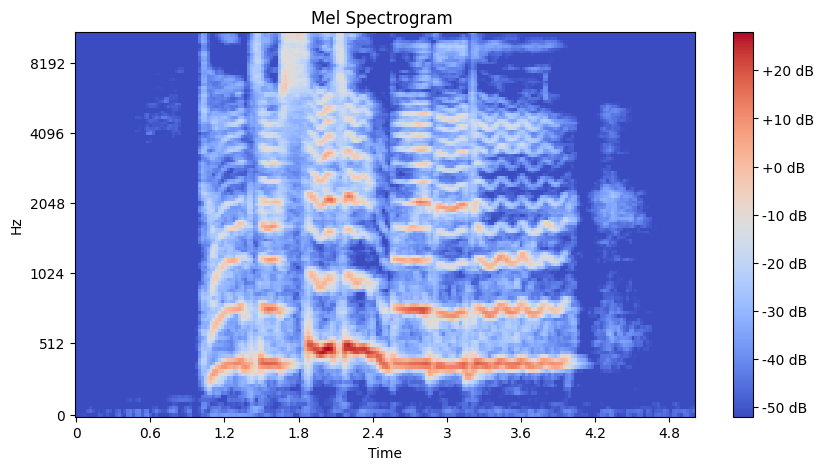

In [ ]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

In [ ]:
import numpy as np
import librosa
from tqdm import tqdm
import timeit

def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

def noise(data, noise_level=0.005):
    """Add random noise to the audio signal."""
    noise = np.random.randn(len(data))
    noisy_data = data + noise_level * noise
    return noisy_data

def pitch(data, sr, n_steps=4):
    """Shift the pitch of the audio signal."""
    # explicitly use keyword arguments for sr and n_steps
    pitched_data = librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)
    return pitched_data

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    aud = extract_features(data, sr)
    audio = np.array(aud)

    noised_audio = noise(data)
    aud2 = extract_features(noised_audio, sr)
    audio = np.vstack((audio, aud2))

    pitched_audio = pitch(data, sr)
    aud3 = extract_features(pitched_audio, sr)
    audio = np.vstack((audio, aud3))

    pitched_audio1 = pitch(data, sr)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio, sr)
    audio = np.vstack((audio, aud4))

    return audio

start = timeit.default_timer()

X, Y = [], []
for path, emotion, index in tqdm(zip(ravdess_df.Path, ravdess_df.Emotions, range(ravdess_df.Path.shape[0]))):
    features = get_features(path)
    if index % 500 == 0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)

print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:01,  1.53s/it]

0 audio has been processed


502it [02:01,  5.23it/s]

500 audio has been processed


1001it [03:57,  3.40it/s]

1000 audio has been processed


1502it [05:55,  4.89it/s]

1500 audio has been processed


2002it [07:49,  5.30it/s]

2000 audio has been processed


2452it [09:36,  4.25it/s]

Done
Time:  576.3792038040001


In [ ]:
len(X), len(Y), ravdess_df.Path.shape

(9808, 9808, (2452,))

In [ ]:
from google.colab import files

Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()




,0,1,2,3,4,5,6,7,8,9,...,4527,4528,4529,4530,4531,4532,4533,4534,4535,Emotions
0,0.181641,0.275391,0.374512,0.374023,0.381348,0.379883,0.371094,0.366211,0.364746,0.378906,...,-2.801897,8.576569,-5.700075,-16.016041,0.849611,-2.048335,1.721531,-7.496924,9.594593,neutral
1,0.249023,0.370605,0.494141,0.491211,0.493164,0.491211,0.503906,0.500000,0.501953,0.518066,...,4.795690,6.772282,-6.112956,-13.854591,-2.303044,1.056178,-0.641698,-6.700742,9.634995,neutral
2,0.225586,0.333496,0.446777,0.459961,0.458496,0.464355,0.461426,0.447754,0.444824,0.452148,...,5.118847,21.962919,-5.952161,0.286623,8.901197,-0.733100,-15.887882,-4.710561,7.686336,neutral
3,0.258789,0.386719,0.510254,0.501953,0.496094,0.491699,0.494141,0.494141,0.497070,0.498047,...,14.067713,10.752311,-3.245493,5.174718,11.126740,-3.355852,-9.157081,-1.062160,8.583831,neutral
4,0.083008,0.138672,0.191406,0.185059,0.161621,0.125977,0.090820,0.083984,0.097656,0.119141,...,-0.757922,-4.495327,-1.227699,6.592571,6.015144,0.185856,4.628263,11.678949,12.090542,disgust


In [ ]:

data = pd.read_csv('./emotion.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4527,4528,4529,4530,4531,4532,4533,4534,4535,Emotions
0,0.181641,0.275391,0.374512,0.374023,0.381348,0.379883,0.371094,0.366211,0.364746,0.378906,...,-2.801897,8.576569,-5.700075,-16.016041,0.849611,-2.048335,1.721531,-7.496924,9.594593,neutral
1,0.249023,0.370605,0.494141,0.491211,0.493164,0.491211,0.503906,0.500000,0.501953,0.518066,...,4.795690,6.772282,-6.112956,-13.854591,-2.303044,1.056178,-0.641698,-6.700742,9.634995,neutral
2,0.225586,0.333496,0.446777,0.459961,0.458496,0.464355,0.461426,0.447754,0.444824,0.452148,...,5.118847,21.962919,-5.952161,0.286623,8.901197,-0.733100,-15.887882,-4.710561,7.686336,neutral
3,0.258789,0.386719,0.510254,0.501953,0.496094,0.491699,0.494141,0.494141,0.497070,0.498047,...,14.067713,10.752311,-3.245493,5.174718,11.126740,-3.355852,-9.157081,-1.062160,8.583831,neutral
4,0.083008,0.138672,0.191406,0.185059,0.161621,0.125977,0.090820,0.083984,0.097656,0.119141,...,-0.757922,-4.495327,-1.227699,6.592571,6.015144,0.185856,4.628263,11.678949,12.090542,disgust


In [ ]:
data.columns


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '4527', '4528', '4529', '4530', '4531', '4532', '4533', '4534', '4535',
       'Emotions'],
      dtype='object', length=4537)

In [ ]:
X = data.drop('Emotions', axis = 1).values
y = data['Emotions'].values

In [ ]:

X.shape, y.shape

((9808, 4536), (9808,))

In [ ]:

np.unique(y)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=42)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')



In [ ]:
from sklearn.impute import SimpleImputer
import joblib

# Create an imputer to fill missing values (NaNs) with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train = imputer.fit_transform(X_train)

# Now fit the classifier
svclassifier.fit(X_train, y_train)
joblib.dump(svclassifier, 'svclassifier_model.pkl')


['svclassifier_model.pkl']

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (NaNs) with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_test = imputer.fit_transform(X_test)

In [ ]:
svclassifier = joblib.load('svclassifier_model.pkl')

# Use the loaded model to make predictions
y_pred = svclassifier.predict(X_test)

In [ ]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 100.0 ----
----test accuracy score 66.15698267074414 ----


              precision    recall  f1-score   support

       angry       0.74      0.83      0.78       611
     disgust       0.59      0.61      0.60       306
        fear       0.57      0.58      0.57       598
       happy       0.68      0.64      0.66       570
     neutral       0.71      0.75      0.73       904
         sad       0.61      0.53      0.57       627
    surprise       0.67      0.58      0.62       308

    accuracy                           0.66      3924
   macro avg       0.65      0.65      0.65      3924
weighted avg       0.66      0.66      0.66      3924

----accuracy score 66.15698267074414 ----


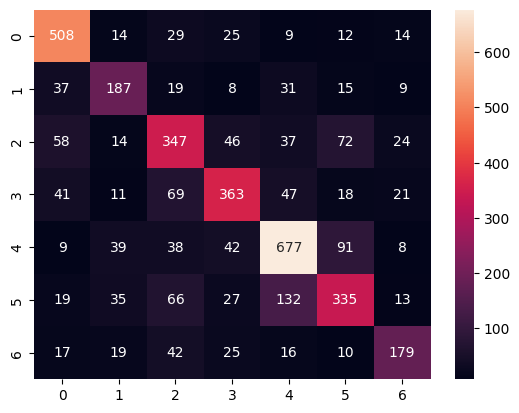

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


# # Setup the pipeline steps: steps
# steps = [('scaler', StandardScaler()),
#         ('SVM', SVC())]

# # Create the pipeline: pipeline
# pipeline = Pipeline(steps)

# # Fit the pipeline to the training set: svc_scaled
# svc_scaled = pipeline.fit(X_train, y_train)

# # Instantiate and fit a classifier to the unscaled data
# svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# # Compute and print metrics
# print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
# print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

In [ ]:
# imputer = SimpleImputer(strategy='median')


In [ ]:
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

In [ ]:
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [ ]:
# svc_scaled = pipeline.fit(X_train, y_train)


In [ ]:
pip install joblib


In [ ]:
# import joblib

# # Save the model to a file
# joblib.dump(svc_scaled, 'svc_scaled_model.pkl')

# print("Model saved successfully!")


In [ ]:
svc_scaled_loaded = joblib.load('svc_scaled_model.pkl')


In [ ]:
y_pred_loaded = svc_scaled_loaded.predict(X_test)


In [ ]:
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print('Accuracy with Loaded Model: {}'.format(accuracy_loaded))


Accuracy with Loaded Model: 0.8476044852191641


              precision    recall  f1-score   support

       angry       0.98      0.93      0.95       611
     disgust       0.84      0.73      0.78       306
        fear       0.91      0.79      0.84       598
       happy       0.91      0.86      0.89       570
     neutral       0.73      0.97      0.83       904
         sad       0.84      0.71      0.77       627
    surprise       0.86      0.82      0.84       308

    accuracy                           0.85      3924
   macro avg       0.87      0.83      0.84      3924
weighted avg       0.86      0.85      0.85      3924

----Accuracy Score: 84.76% ----


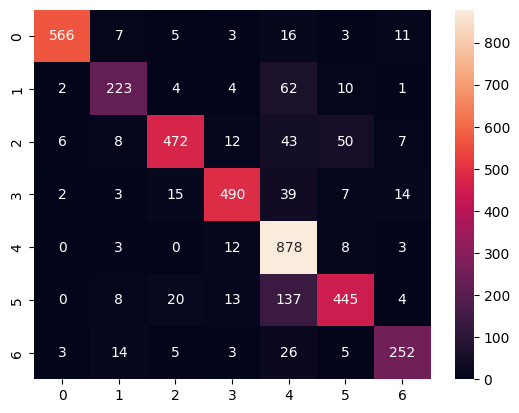

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test, y_pred_loaded))

# Calculate accuracy in percentage
acc_percentage = float(accuracy_loaded) * 100
print("----Accuracy Score: {:.2f}% ----".format(acc_percentage))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_loaded)

df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()


In [ ]:
pip install gradio

In [ ]:
import gradio as gr
import librosa
import numpy as np
import joblib

# Load your trained model
model = joblib.load('svc_scaled_model.pkl')  # Update with your model path

# Function to extract features (same as training)
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

# Use only original features for prediction, not augmented (no noise or pitch shift)
def get_original_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    features = extract_features(data, sr)

    # Debugging: Print the feature size
    print(f"Extracted original features shape: {features.shape}")

    return features

# Gradio prediction function
def predict_emotion(audio_file):
    # Extract original features only (no augmentation)
    features = get_original_features(audio_file)

    # Reshape features to match model input (1 sample, many features)
    features = features.reshape(1, -1)  # Reshape to 2D array

    # Debugging: Check the shape after reshaping
    print(f"Reshaped features for prediction: {features.shape}")

    # Debugging: Check if the features match the model's input expectations
    print(f"Model expects input shape: {model.n_features_in_} features")

    # Make prediction
    try:
        prediction = model.predict(features)
        print(f"Prediction: {prediction}")
        return prediction[0]  # Return the first prediction
    except Exception as e:
        print(f"Error during prediction: {e}")
        return f"Error during prediction: {e}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Audio(type="filepath"),
    outputs="text",
    title="Speech Emotion Recognition",
    description="Upload an audio file to predict the emotion.",
)

# Launch the interface
if __name__ == "__main__":
    interface.launch()


In [ ]:
svc_scaled_loaded = joblib.load('svc_scaled_model.pkl')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(rf_classifier, 'rf_model.pkl')


Random Forest Accuracy: 0.5846075433231397


Random Forest Accuracy: 0.58
----Accuracy Score: 58.46% ----
Classification Report:
               precision    recall  f1-score   support

       angry       0.67      0.74      0.70       611
     disgust       0.60      0.25      0.36       306
        fear       0.62      0.44      0.51       598
       happy       0.58      0.58      0.58       570
     neutral       0.53      0.92      0.67       904
         sad       0.67      0.30      0.41       627
    surprise       0.56      0.49      0.52       308

    accuracy                           0.58      3924
   macro avg       0.60      0.53      0.54      3924
weighted avg       0.60      0.58      0.56      3924



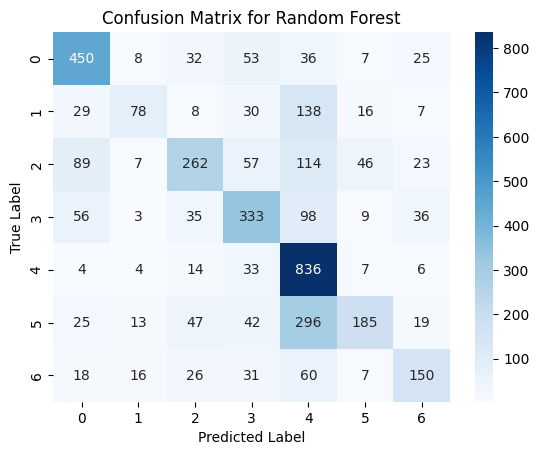

In [ ]:
rf_loaded = joblib.load('rf_model.pkl')

# Prediction and evaluation
rf_predictions = rf_loaded.predict(X_test)

# Accuracy score
accuracy_loaded = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy_loaded:.2f}")

# Calculate accuracy in percentage
acc_percentage = float(accuracy_loaded) * 100
print("----Accuracy Score: {:.2f}% ----".format(acc_percentage))

# Classification report
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Convert confusion matrix into DataFrame for visualization

df_cm = pd.DataFrame(cm)

# Visualize confusion matrix using seaborn heatmap
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

# Show the heatmap
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib

# Initialize MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(mlp_classifier, 'mlp_model.pkl')

# Prediction and evaluation
mlp_predictions = mlp_classifier.predict(X_test)
print(f"MLP Classifier Accuracy: {accuracy_score(y_test, mlp_predictions)}")


MLP Classifier Accuracy: 0.5996432212028542


MLP Classifier Accuracy: 0.60
----Accuracy Score: 59.96% ----
Classification Report:
               precision    recall  f1-score   support

       angry       0.69      0.70      0.69       611
     disgust       0.53      0.50      0.52       306
        fear       0.54      0.53      0.53       598
       happy       0.58      0.61      0.59       570
     neutral       0.67      0.71      0.69       904
         sad       0.50      0.49      0.50       627
    surprise       0.61      0.52      0.56       308

    accuracy                           0.60      3924
   macro avg       0.59      0.58      0.58      3924
weighted avg       0.60      0.60      0.60      3924



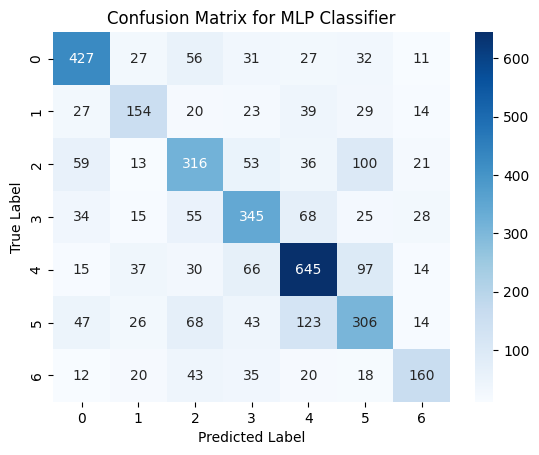

In [ ]:

# Accuracy score
accuracy_loaded = accuracy_score(y_test, mlp_predictions)
print(f"MLP Classifier Accuracy: {accuracy_loaded:.2f}")

# Calculate accuracy in percentage
acc_percentage = float(accuracy_loaded) * 100
print("----Accuracy Score: {:.2f}% ----".format(acc_percentage))

# Classification report
print("Classification Report:\n", classification_report(y_test, mlp_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test, mlp_predictions)

# Convert confusion matrix into DataFrame for visualization
df_cm = pd.DataFrame(cm)

# Visualize confusion matrix using seaborn heatmap
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

# Show the heatmap
plt.title('Confusion Matrix for MLP Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

XGBoost Accuracy: 0.70
----Accuracy Score: 70.34% ----
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       611
           1       0.74      0.59      0.66       306
           2       0.70      0.58      0.63       598
           3       0.70      0.70      0.70       570
           4       0.68      0.90      0.78       904
           5       0.64      0.53      0.58       627
           6       0.69      0.64      0.66       308

    accuracy                           0.70      3924
   macro avg       0.71      0.68      0.69      3924
weighted avg       0.70      0.70      0.70      3924



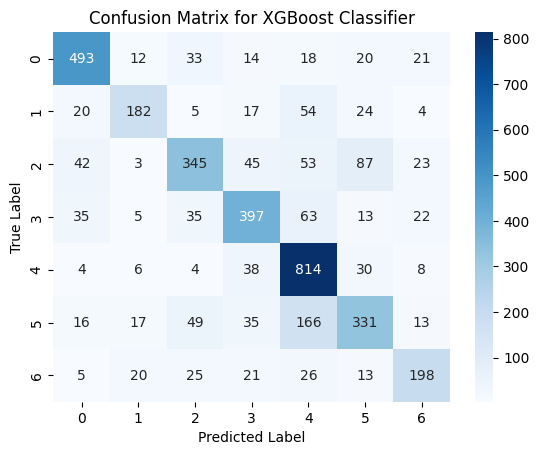

In [ ]:
xgb_loaded = joblib.load('xgb_model.pkl')

# Prediction and evaluation
xgb_predictions = xgb_loaded.predict(X_test)

# Convert numeric predictions back to original labels for easier interpretation
xgb_predictions_labels = label_encoder.inverse_transform(xgb_predictions)

# Calculate accuracy
accuracy_loaded = accuracy_score(y_test_encoded, xgb_predictions)
print(f"XGBoost Accuracy: {accuracy_loaded:.2f}")

# Calculate accuracy in percentage
acc_percentage = float(accuracy_loaded) * 100
print("----Accuracy Score: {:.2f}% ----".format(acc_percentage))

# Classification report
print("Classification Report:\n", classification_report(y_test_encoded, xgb_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, xgb_predictions)

# Convert confusion matrix into DataFrame for visualization
df_cm = pd.DataFrame(cm)

# Visualize confusion matrix using seaborn heatmap
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

# Show the heatmap
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<ipython-input-60-eefdccb40ca1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

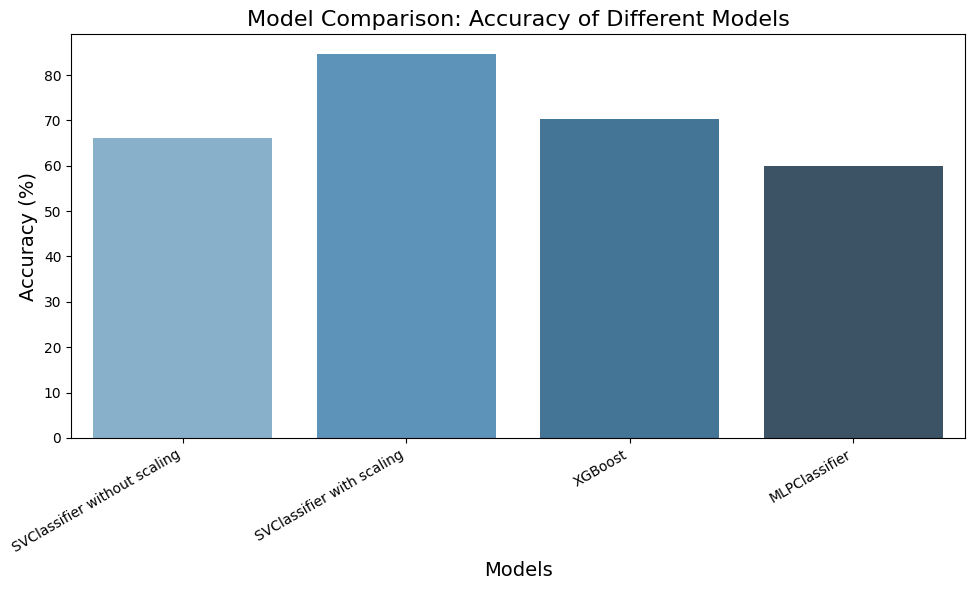

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: model names and their accuracy scores
models = ['SVClassifier without scaling', 'SVClassifier with scaling', 'XGBoost', 'MLPClassifier']
accuracies = [66.16, 84.76, 70.34, 59.96]  # Accuracy values from your models

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='Blues_d')

# Adding title and labels
plt.title('Model Comparison: Accuracy of Different Models', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Models', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


<ipython-input-62-f15f0631a4bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

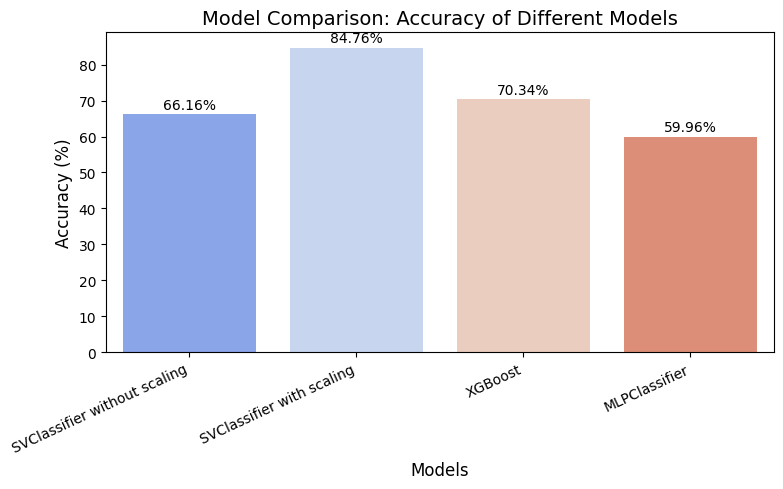

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: model names and their accuracy scores
models = ['SVClassifier without scaling', 'SVClassifier with scaling', 'XGBoost', 'MLPClassifier']
accuracies = [66.16, 84.76, 70.34, 59.96]  # Accuracy values from your models

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'Accuracy (%)': accuracies})

# Plot using Seaborn
plt.figure(figsize=(8, 5))  # Smaller figure size
ax = sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='coolwarm')

# Add accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=10, color='black',
                xytext=(0, 4),
                textcoords='offset points')

# Adding title and labels with adjusted font sizes
plt.title('Model Comparison: Accuracy of Different Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Models', fontsize=12)

# Rotate x-axis labels for better readability and reduce their font size
plt.xticks(rotation=25, ha='right', fontsize=10)

# Adjust layout for tighter fitting
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-1-c2cad094e0f6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df_precision, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

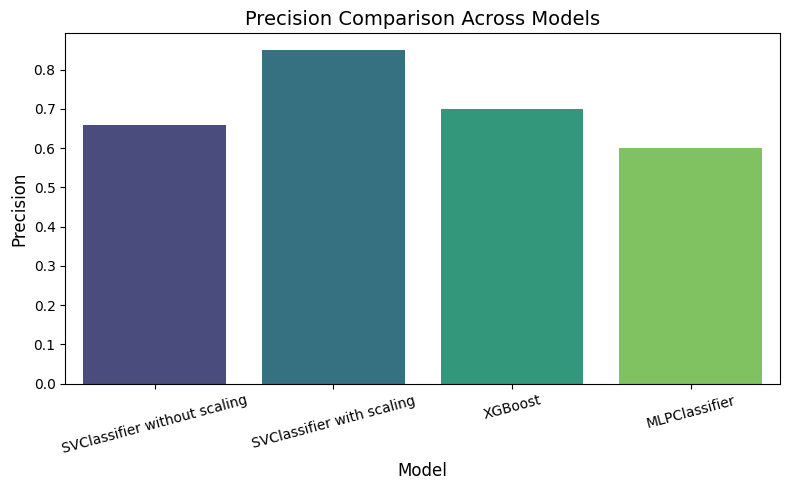

<ipython-input-1-c2cad094e0f6>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=df_recall, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a le

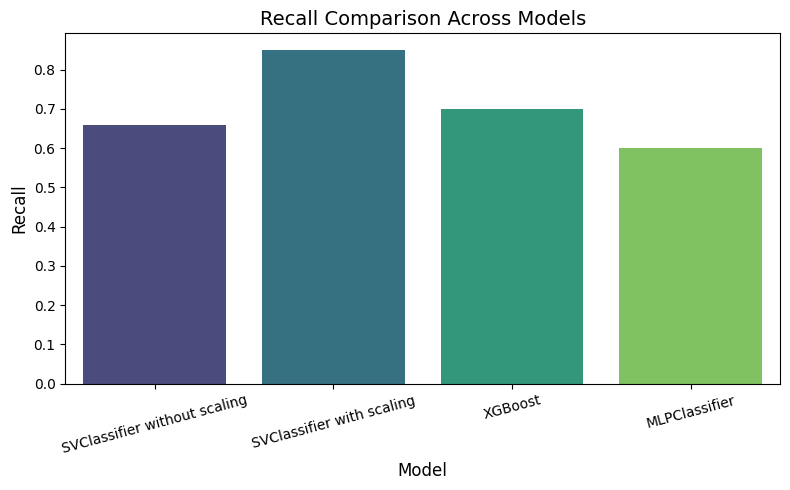

<ipython-input-1-c2cad094e0f6>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=df_f1, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

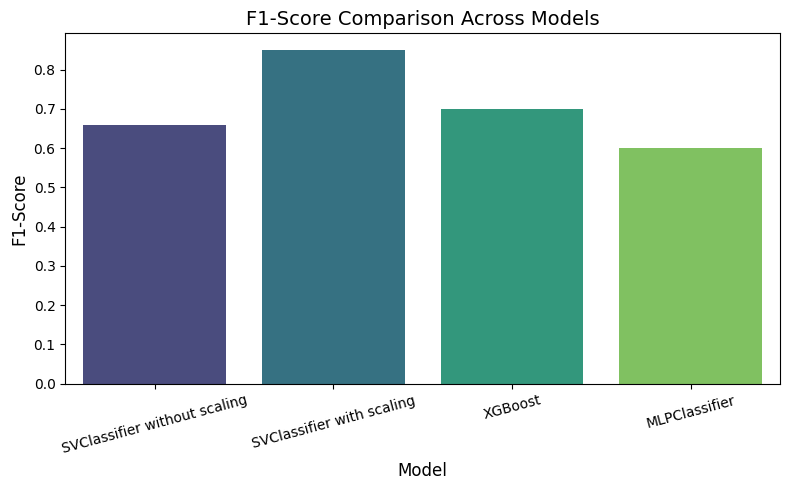

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample precision, recall, and F1-score data for the models
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'SVClassifier without scaling': [0.66, 0.66, 0.66],
    'SVClassifier with scaling': [0.85, 0.85, 0.85],
    'XGBoost': [0.70, 0.70, 0.70],
    'MLPClassifier': [0.60, 0.60, 0.60]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Split the data into three separate DataFrames for precision, recall, and F1-score
df_precision = df[df['Metric'] == 'Precision'].drop(columns='Metric').T.reset_index()
df_recall = df[df['Metric'] == 'Recall'].drop(columns='Metric').T.reset_index()
df_f1 = df[df['Metric'] == 'F1-Score'].drop(columns='Metric').T.reset_index()

# Rename columns for better understanding
df_precision.columns = ['Model', 'Precision']
df_recall.columns = ['Model', 'Recall']
df_f1.columns = ['Model', 'F1-Score']

# Set a color palette
palette = sns.color_palette("viridis", 4)

# Plot Precision comparison chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Precision', data=df_precision, palette=palette)
plt.title('Precision Comparison Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot Recall comparison chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Recall', data=df_recall, palette=palette)
plt.title('Recall Comparison Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot F1-Score comparison chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1-Score', data=df_f1, palette=palette)
plt.title('F1-Score Comparison Across Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


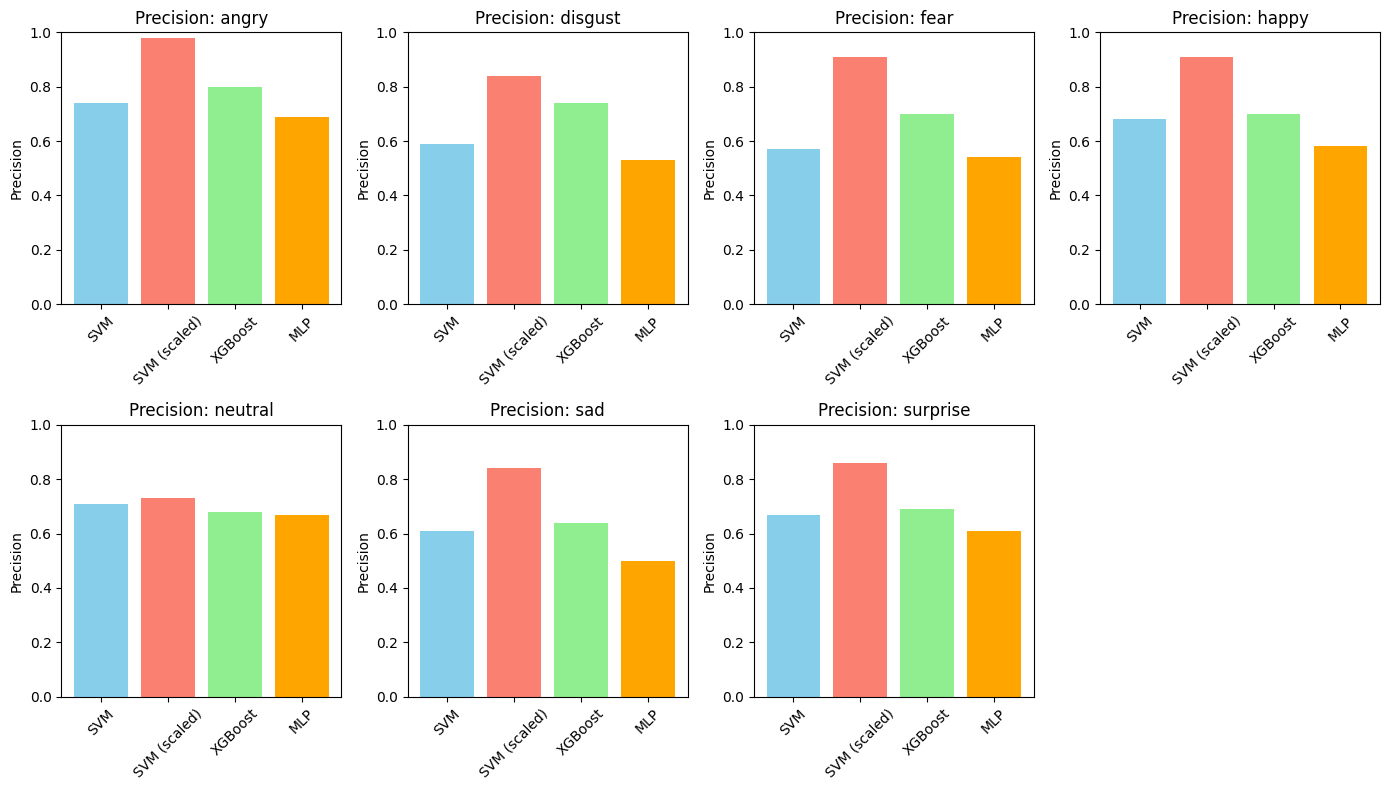

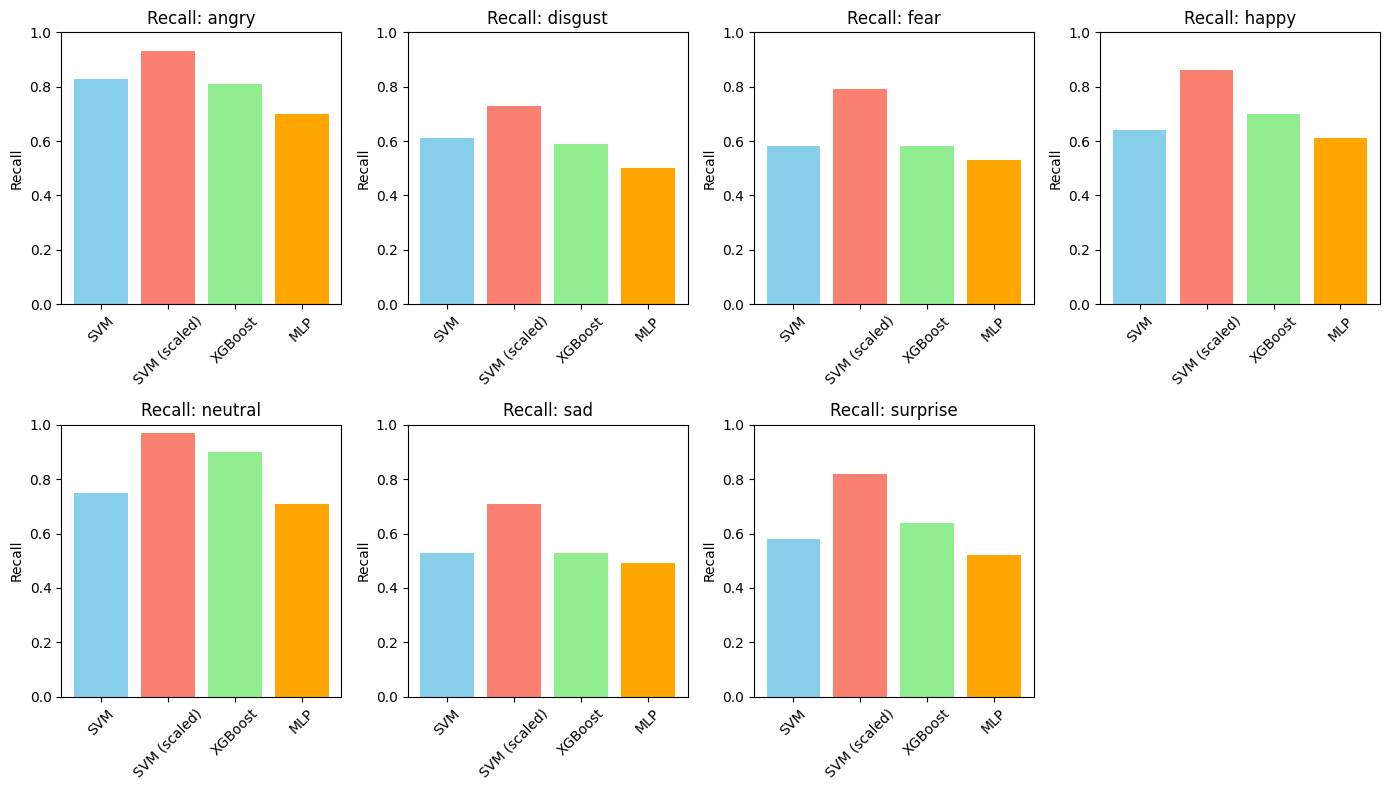

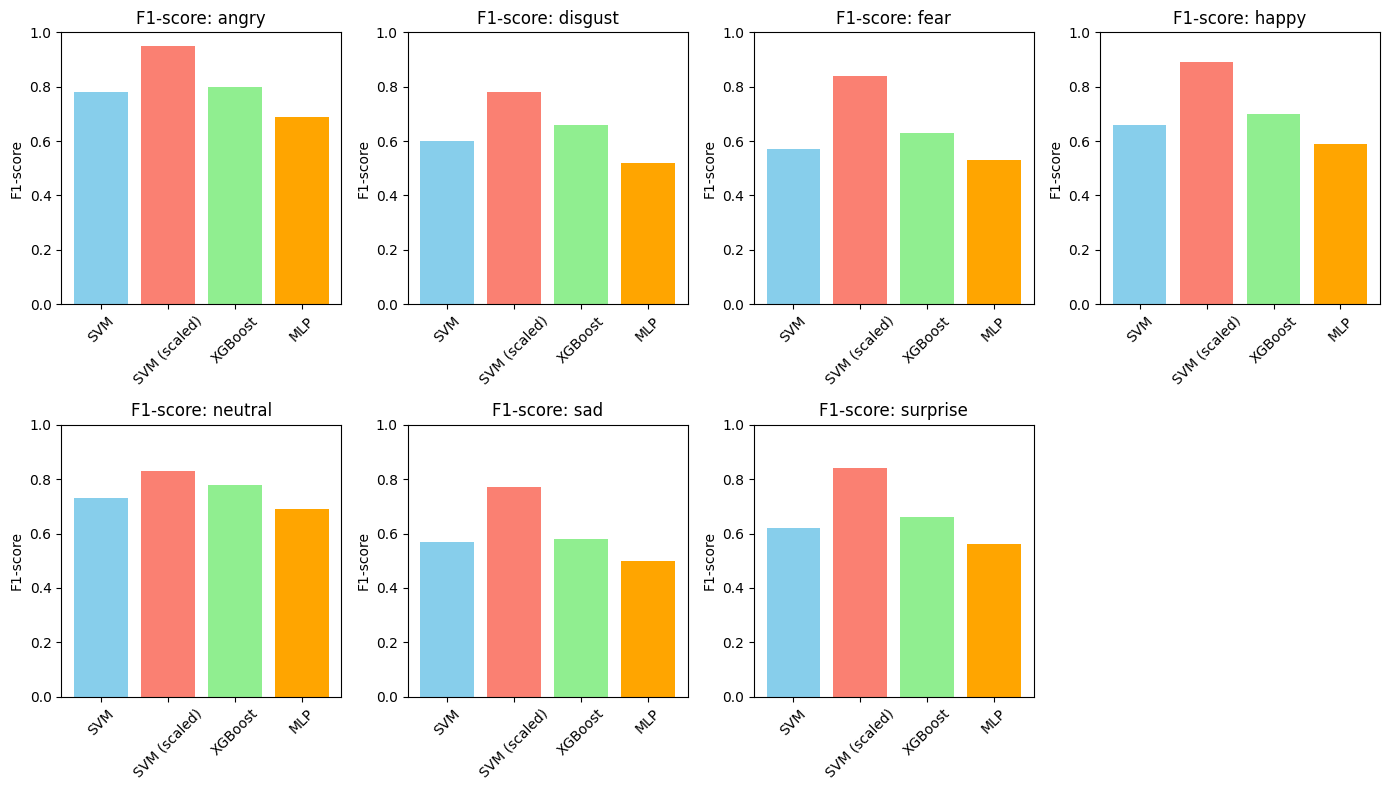

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define classes
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Precision, Recall, and F1-scores for each model (values from your classification reports)
precision_vals = {
    'angry': [0.74, 0.98, 0.80, 0.69],
    'disgust': [0.59, 0.84, 0.74, 0.53],
    'fear': [0.57, 0.91, 0.70, 0.54],
    'happy': [0.68, 0.91, 0.70, 0.58],
    'neutral': [0.71, 0.73, 0.68, 0.67],
    'sad': [0.61, 0.84, 0.64, 0.50],
    'surprise': [0.67, 0.86, 0.69, 0.61]
}

recall_vals = {
    'angry': [0.83, 0.93, 0.81, 0.70],
    'disgust': [0.61, 0.73, 0.59, 0.50],
    'fear': [0.58, 0.79, 0.58, 0.53],
    'happy': [0.64, 0.86, 0.70, 0.61],
    'neutral': [0.75, 0.97, 0.90, 0.71],
    'sad': [0.53, 0.71, 0.53, 0.49],
    'surprise': [0.58, 0.82, 0.64, 0.52]
}

f1_vals = {
    'angry': [0.78, 0.95, 0.80, 0.69],
    'disgust': [0.60, 0.78, 0.66, 0.52],
    'fear': [0.57, 0.84, 0.63, 0.53],
    'happy': [0.66, 0.89, 0.70, 0.59],
    'neutral': [0.73, 0.83, 0.78, 0.69],
    'sad': [0.57, 0.77, 0.58, 0.50],
    'surprise': [0.62, 0.84, 0.66, 0.56]
}

# Models
models = ['SVM', 'SVM (scaled)', 'XGBoost', 'MLP']

# Plotting Precision for each class
plt.figure(figsize=(14, 8))
for i, cls in enumerate(classes):
    plt.subplot(2, 4, i+1)
    plt.bar(models, precision_vals[cls], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    plt.title(f'Precision: {cls}')
    plt.ylim(0, 1)
    plt.ylabel('Precision')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Recall for each class
plt.figure(figsize=(14, 8))
for i, cls in enumerate(classes):
    plt.subplot(2, 4, i+1)
    plt.bar(models, recall_vals[cls], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    plt.title(f'Recall: {cls}')
    plt.ylim(0, 1)
    plt.ylabel('Recall')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting F1-score for each class
plt.figure(figsize=(14, 8))
for i, cls in enumerate(classes):
    plt.subplot(2, 4, i+1)
    plt.bar(models, f1_vals[cls], color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    plt.title(f'F1-score: {cls}')
    plt.ylim(0, 1)
    plt.ylabel('F1-score')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


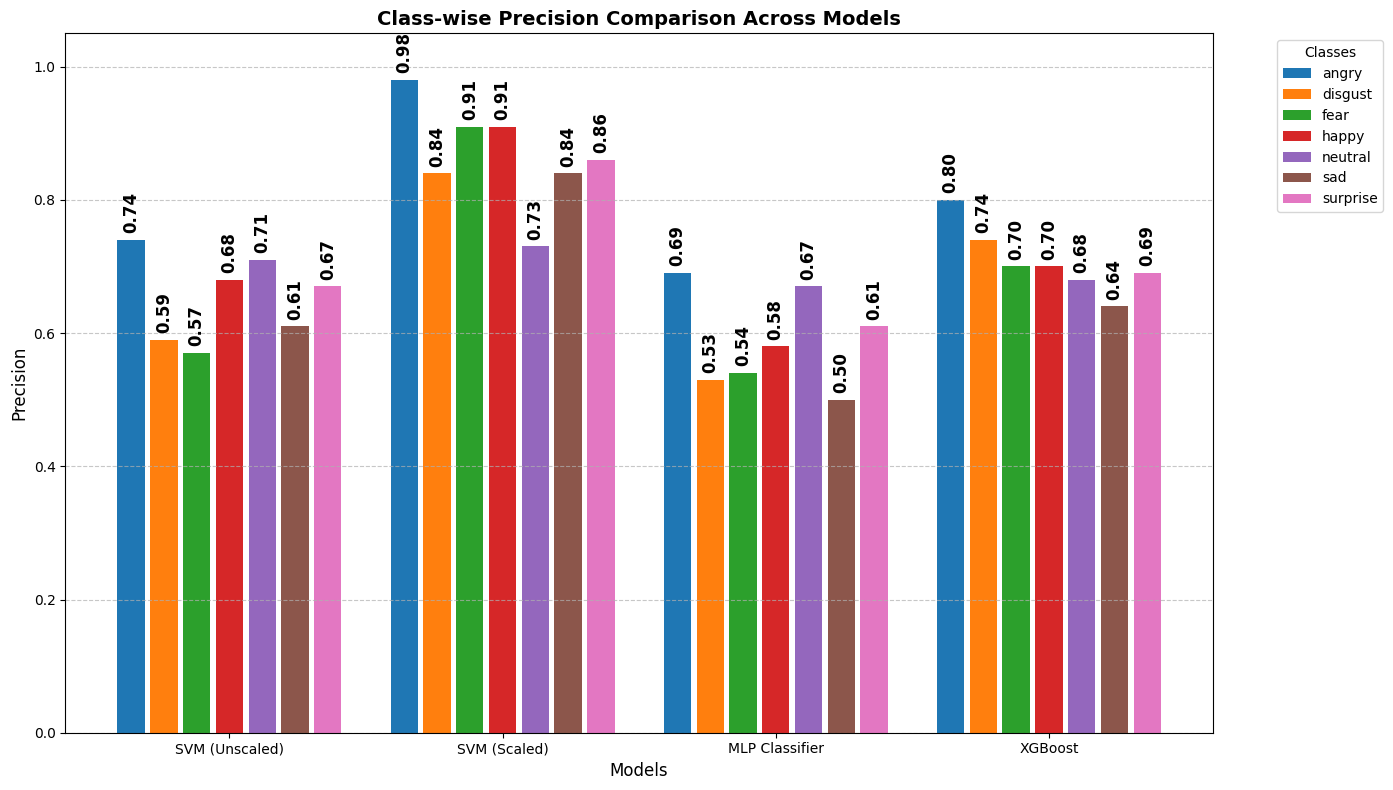

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define classes and models
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
models = ['SVM (Unscaled)', 'SVM (Scaled)', 'MLP Classifier', 'XGBoost']

# Updated precision values from your classification reports
precision_vals = {
    'angry': [0.74, 0.98, 0.69, 0.80],
    'disgust': [0.59, 0.84, 0.53, 0.74],
    'fear': [0.57, 0.91, 0.54, 0.70],
    'happy': [0.68, 0.91, 0.58, 0.70],
    'neutral': [0.71, 0.73, 0.67, 0.68],
    'sad': [0.61, 0.84, 0.50, 0.64],
    'surprise': [0.67, 0.86, 0.61, 0.69]
}

# Prepare data for plotting
model_indices = np.arange(len(models))  # indices for models
bar_width = 0.1  # width of each bar
spacing = 0.02  # extra space between the bars
bar_positions = [model_indices + i * (bar_width + spacing) for i in range(len(classes))]

# Set figure size
plt.figure(figsize=(14, 8))

# Define colors for each class
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plot bars for each class with different colors
for i, cls in enumerate(classes):
    bars = plt.bar(bar_positions[i], precision_vals[cls], width=bar_width, label=cls, color=colors[i])

    # Add staggered value labels on top of each bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,  # Adjusted space between value and top of the pillar
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,  # Increased font size
            fontweight='bold',  # Make text bold
            color='black',
            rotation=90  # Rotate text vertically
        )

# Labeling and aesthetics
plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Class-wise Precision Comparison Across Models', color='black',fontsize=14, fontweight='bold')
plt.xticks(model_indices + (bar_width + spacing) * (len(classes) - 1) / 2, models, fontsize=10)
plt.ylim(0, 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


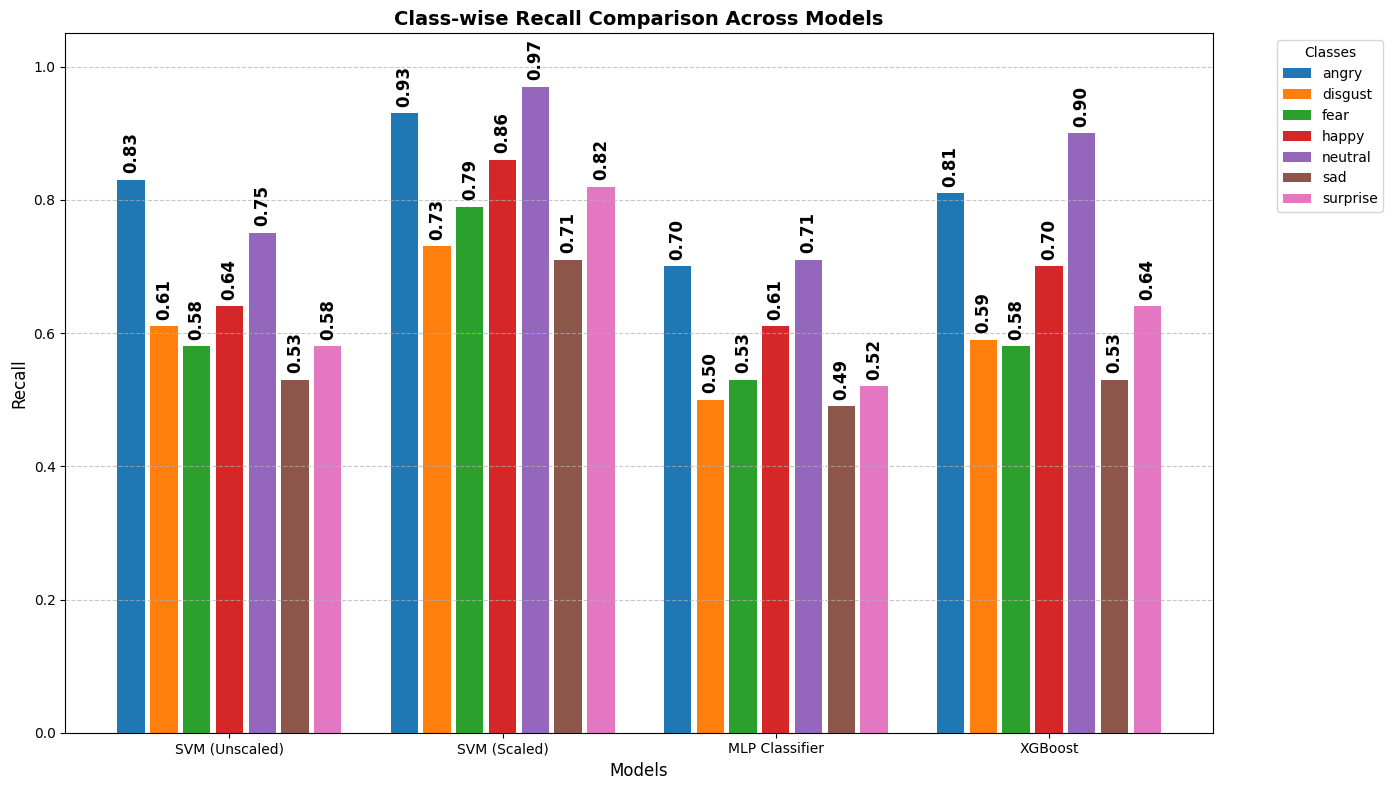

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define classes and models
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
models = ['SVM (Unscaled)', 'SVM (Scaled)', 'MLP Classifier', 'XGBoost']

# Updated recall values from your classification reports
recall_vals = {
    'angry': [0.83, 0.93, 0.70, 0.81],
    'disgust': [0.61, 0.73, 0.50, 0.59],
    'fear': [0.58, 0.79, 0.53, 0.58],
    'happy': [0.64, 0.86, 0.61, 0.70],
    'neutral': [0.75, 0.97, 0.71, 0.90],
    'sad': [0.53, 0.71, 0.49, 0.53],
    'surprise': [0.58, 0.82, 0.52, 0.64]
}

# Prepare data for plotting
model_indices = np.arange(len(models))  # indices for models
bar_width = 0.1  # width of each bar
spacing = 0.02  # extra space between the bars
bar_positions = [model_indices + i * (bar_width + spacing) for i in range(len(classes))]

# Set figure size
plt.figure(figsize=(14, 8))

# Define colors for each class
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plot bars for each class with different colors
for i, cls in enumerate(classes):
    bars = plt.bar(bar_positions[i], recall_vals[cls], width=bar_width, label=cls, color=colors[i])

    # Add staggered value labels on top of each bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,  # Adjusted space between value and top of the pillar
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,  # Increased font size
            fontweight='bold',  # Make text bold
            color='black',
            rotation=90  # Rotate text vertically
        )

# Labeling and aesthetics
plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Class-wise Recall Comparison Across Models', color='black', fontsize=14, fontweight='bold')
plt.xticks(model_indices + (bar_width + spacing) * (len(classes) - 1) / 2, models, fontsize=10)
plt.ylim(0, 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


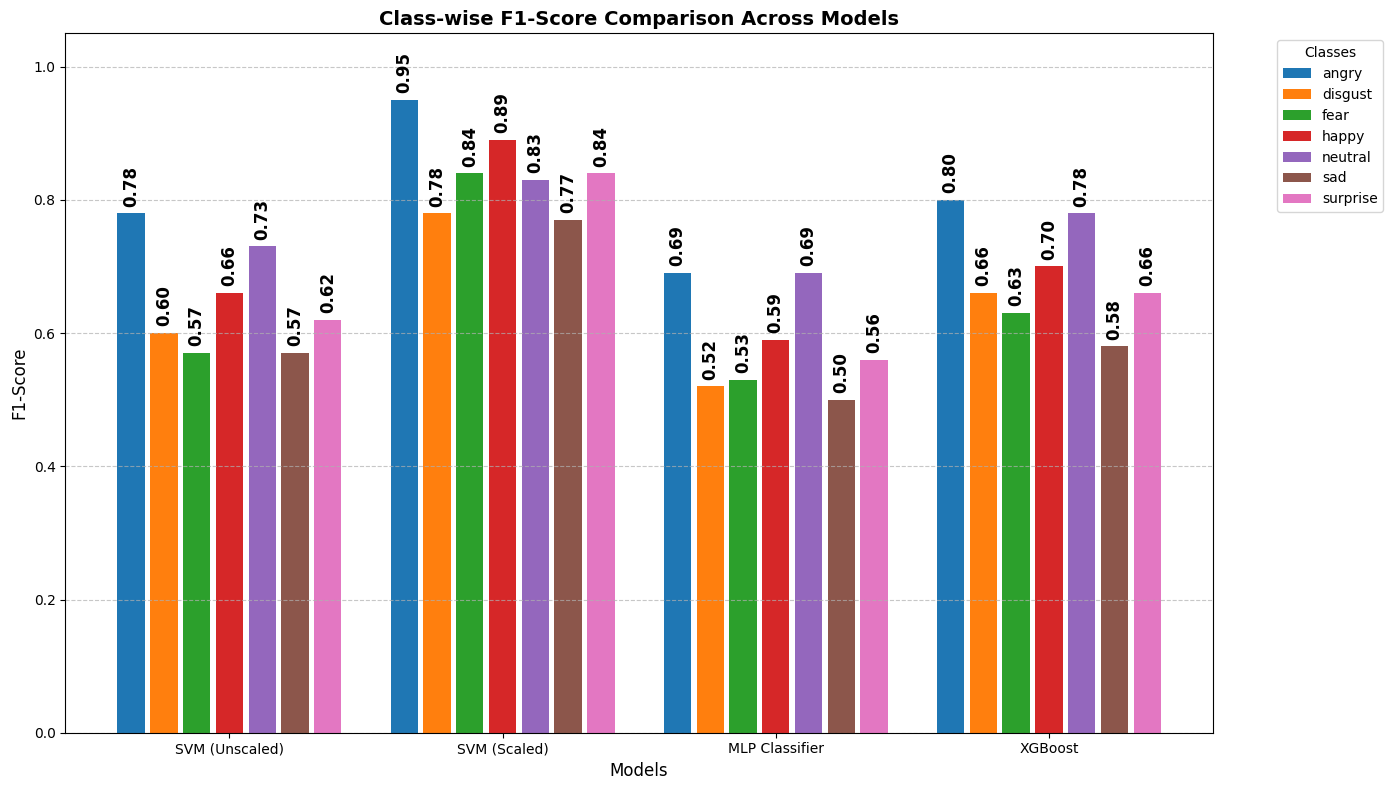

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define classes and models
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
models = ['SVM (Unscaled)', 'SVM (Scaled)', 'MLP Classifier', 'XGBoost']

# Updated F1-score values from your classification reports
f1_score_vals = {
    'angry': [0.78, 0.95, 0.69, 0.80],
    'disgust': [0.60, 0.78, 0.52, 0.66],
    'fear': [0.57, 0.84, 0.53, 0.63],
    'happy': [0.66, 0.89, 0.59, 0.70],
    'neutral': [0.73, 0.83, 0.69, 0.78],
    'sad': [0.57, 0.77, 0.50, 0.58],
    'surprise': [0.62, 0.84, 0.56, 0.66]
}

# Prepare data for plotting
model_indices = np.arange(len(models))  # indices for models
bar_width = 0.1  # width of each bar
spacing = 0.02  # extra space between the bars
bar_positions = [model_indices + i * (bar_width + spacing) for i in range(len(classes))]

# Set figure size
plt.figure(figsize=(14, 8))

# Define colors for each class
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plot bars for each class with different colors
for i, cls in enumerate(classes):
    bars = plt.bar(bar_positions[i], f1_score_vals[cls], width=bar_width, label=cls, color=colors[i])

    # Add staggered value labels on top of each bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + 0.01,  # Adjusted space between value and top of the pillar
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,  # Increased font size
            fontweight='bold',  # Make text bold
            color='black',
            rotation=90  # Rotate text vertically
        )

# Labeling and aesthetics
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Class-wise F1-Score Comparison Across Models', color='black', fontsize=14, fontweight='bold')
plt.xticks(model_indices + (bar_width + spacing) * (len(classes) - 1) / 2, models, fontsize=10)
plt.ylim(0, 1.05)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend outside the plot
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
import joblib
import numpy as np

svc_scaled = joblib.load('/svc_scaled_model (1).pkl')




In [5]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [6]:
import gradio as gr
import librosa
import numpy as np
import joblib

# Load your trained model
model = joblib.load('/svc_scaled_model (1).pkl')  # Update with your model path

# Function to extract features (same as training)
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

# Use only original features for prediction, not augmented (no noise or pitch shift)
def get_original_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    features = extract_features(data, sr)

    # Debugging: Print the feature size
    print(f"Extracted original features shape: {features.shape}")

    return features

# Gradio prediction function
def predict_emotion(audio_file):
    # Extract original features only (no augmentation)
    features = get_original_features(audio_file)

    # Reshape features to match model input (1 sample, many features)
    features = features.reshape(1, -1)  # Reshape to 2D array

    # Debugging: Check the shape after reshaping
    print(f"Reshaped features for prediction: {features.shape}")

    # Debugging: Check if the features match the model's input expectations
    print(f"Model expects input shape: {model.n_features_in_} features")

    # Make prediction
    try:
        prediction = model.predict(features)
        print(f"Prediction: {prediction}")
        return prediction[0]  # Return the first prediction
    except Exception as e:
        print(f"Error during prediction: {e}")
        return f"Error during prediction: {e}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Audio(type="filepath"),
    outputs="text",
    title="Speech Emotion Recognition",
    description="Upload an audio file to predict the emotion.",
)

# Launch the interface
if __name__ == "__main__":
    interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ef65258b5282892ae8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
